In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-baby-names/StateNames.csv
/kaggle/input/us-baby-names/NationalReadMe.pdf
/kaggle/input/us-baby-names/hashes.txt
/kaggle/input/us-baby-names/NationalNames.csv
/kaggle/input/us-baby-names/StateReadMe.pdf
/kaggle/input/us-baby-names/database.sqlite


In [43]:
import os
os.listdir('/kaggle/input/')

['us-baby-names']

In [44]:
data = pd.read_csv('/kaggle/input/us-baby-names/NationalNames.csv')

In [45]:
data.shape

(1825433, 5)

In [46]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [47]:
data.tail()

,Id,Name,Year,Gender,Count
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [48]:
data['Name'].nunique()

93889

In [49]:
data['Gender'].astype('category').cat.codes

0          0
1          0
2          0
3          0
4          0
          ..
1825428    1
1825429    1
1825430    1
1825431    1
1825432    1
Length: 1825433, dtype: int8

In [50]:
data['Gender'] = data['Gender'].astype('category').cat.codes

In [51]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,0,7065
1,2,Anna,1880,0,2604
2,3,Emma,1880,0,2003
3,4,Elizabeth,1880,0,1939
4,5,Minnie,1880,0,1746


In [52]:
df = data.groupby('Name').mean()['Gender'].reset_index()

In [53]:
df

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0
...,...,...
93884,Zytavious,1.0
93885,Zyvion,1.0
93886,Zyyanna,0.0
93887,Zyyon,1.0


In [54]:
df['Gender'] = df['Gender'].astype('int')
df

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1
...,...,...
93884,Zytavious,1
93885,Zyvion,1
93886,Zyyanna,0
93887,Zyyon,1


In [55]:
import string
letters = list(string.ascii_lowercase)

In [56]:
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [57]:
vocab = dict(zip(letters, range(1,27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [58]:
r_vocab = dict(zip(range(1,27), letters))
r_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [59]:
def word_to_number():
    for i in range(0, df.shape[0]):
        seq = [vocab[letters.lower()] for letters in df['Name'][i]]
        df['Name'][i] = seq

In [60]:
word_to_number()

/tmp/ipykernel_32/3395657508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][i] = seq


In [61]:
df.head()

,Name,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
4,"[1, 1, 4, 1, 13]",1


In [62]:
X = df['Name'].values
y = df['Gender'].values

In [63]:
name_length = [len(X[i]) for i in range(0, df.shape[0])]

In [64]:
name_length

[5,
 5,
 5,
 9,
 5,
 5,
 7,
 5,
 6,
 6,
 8,
 5,
 7,
 6,
 7,
 4,
 6,
 5,
 5,
 6,
 7,
 5,
 6,
 7,
 7,
 5,
 5,
 7,
 7,
 6,
 6,
 7,
 5,
 5,
 7,
 5,
 4,
 5,
 6,
 5,
 6,
 5,
 8,
 5,
 6,
 6,
 6,
 6,
 5,
 8,
 7,
 5,
 5,
 6,
 6,
 7,
 7,
 5,
 4,
 5,
 8,
 5,
 9,
 7,
 6,
 6,
 7,
 6,
 7,
 7,
 4,
 7,
 8,
 6,
 7,
 6,
 5,
 6,
 7,
 8,
 8,
 7,
 8,
 8,
 5,
 6,
 8,
 7,
 8,
 8,
 8,
 7,
 7,
 6,
 7,
 5,
 6,
 7,
 6,
 8,
 7,
 7,
 6,
 7,
 5,
 7,
 6,
 7,
 7,
 6,
 7,
 7,
 8,
 12,
 11,
 7,
 8,
 7,
 8,
 8,
 7,
 5,
 5,
 5,
 6,
 7,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 6,
 5,
 6,
 8,
 6,
 6,
 6,
 5,
 5,
 5,
 7,
 6,
 7,
 5,
 6,
 7,
 6,
 7,
 5,
 6,
 6,
 5,
 6,
 4,
 6,
 5,
 6,
 7,
 5,
 6,
 7,
 6,
 7,
 6,
 7,
 8,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 5,
 5,
 4,
 9,
 9,
 8,
 6,
 7,
 8,
 5,
 6,
 9,
 5,
 5,
 6,
 7,
 4,
 5,
 6,
 6,
 7,
 8,
 5,
 5,
 6,
 6,
 5,
 6,
 8,
 5,
 6,
 7,
 5,
 6,
 6,
 7,
 8,
 5,
 6,
 5,
 5,
 6,
 7,
 7,
 8,
 9,
 8,
 9,
 5,
 6,
 4,
 5,
 6,
 7,
 5,
 4,
 5,
 7,
 6,
 7,
 5,
 6,
 7,
 7,
 9,
 9,
 10,
 10,
 9,
 11,
 9,
 11,
 8

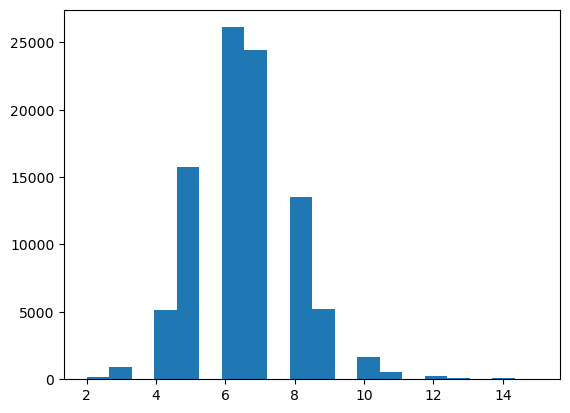

In [65]:
plt.hist(name_length, bins = 20)
plt.show()

In [66]:
from keras.utils import pad_sequences

In [68]:
x = pad_sequences(df['Name'].values, maxlen=10, padding='pre')

In [69]:
x

array([[ 0,  0,  0, ...,  2,  1, 14],
       [ 0,  0,  0, ...,  2,  8,  1],
       [ 0,  0,  0, ...,  2,  9,  4],
       ...,
       [ 0,  0,  0, ..., 14, 14,  1],
       [ 0,  0,  0, ..., 25, 15, 14],
       [ 0,  0,  0, ..., 25, 26, 24]], dtype=int32)

In [71]:
from keras.layers import Input, Embedding, Dense, LSTM
from keras.models import Model

In [72]:
vocab_size = len(vocab) + 1
vocab_size

27

In [73]:
inp = Input(shape= (10,))
emn = Embedding(input_dim = vocab_size, output_dim = 5)(inp)

lstm1 = LSTM(units = 32, return_sequences = True)(emn)
lstm2 = LSTM(units=64)(lstm1)

out = Dense(units=1, activation = 'sigmoid')(lstm2)

my_model = Model(inputs = inp, outputs = out)

In [76]:
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 5)             135       
                                                                 
 lstm (LSTM)                 (None, 10, 32)            4864      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 29,896
Trainable params: 29,896
Non-trainable params: 0
_________________________________________________________________


In [77]:
my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [78]:
his = my_model.fit(x, y, epochs = 10, batch_size = 256, validation_split=0.2)

Epoch 1/10
294/294 [==============================] - 15s 36ms/step - loss: 0.5605 - acc: 0.7150 - val_loss: 0.4146 - val_acc: 0.8104
Epoch 2/10
294/294 [==============================] - 10s 34ms/step - loss: 0.4114 - acc: 0.8062 - val_loss: 0.3869 - val_acc: 0.8236
Epoch 3/10
294/294 [==============================] - 10s 33ms/step - loss: 0.3952 - acc: 0.8145 - val_loss: 0.3855 - val_acc: 0.8225
Epoch 4/10
294/294 [==============================] - 10s 33ms/step - loss: 0.3912 - acc: 0.8160 - val_loss: 0.3826 - val_acc: 0.8255
Epoch 5/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3873 - acc: 0.8189 - val_loss: 0.3880 - val_acc: 0.8229
Epoch 6/10
294/294 [==============================] - 10s 33ms/step - loss: 0.3842 - acc: 0.8202 - val_loss: 0.3758 - val_acc: 0.8268
Epoch 7/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3803 - acc: 0.8219 - val_loss: 0.3728 - val_acc: 0.8295
Epoch 8/10
294/294 [==============================] - 10s 33ms

In [79]:
h = his.history

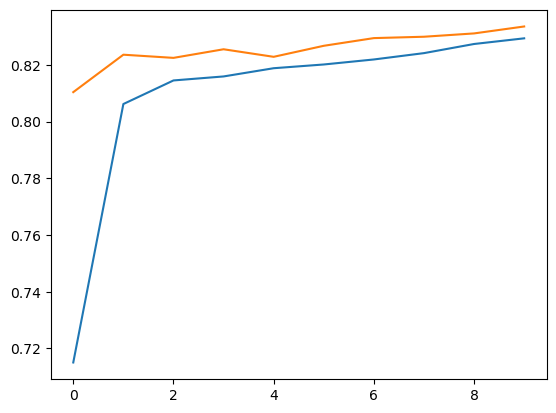

In [80]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.show()

In [81]:
name = "Tom"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

array([[ 0,  0,  0,  0,  0,  0,  0, 20, 15, 13]], dtype=int32)

In [82]:
y_pred = my_model.predict(x_test)
y_pred

1/1 [==============================] - 1s 866ms/step


array([[0.722273]], dtype=float32)

In [84]:
if y_pred < 0.5:
    print('Female')
else:
    print('Male')

Male


In [85]:
name = "Brad"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 24ms/step
Male


In [86]:
name = "Marry"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 24ms/step
Female


In [87]:
name = "Priyanka"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 23ms/step
Female


In [88]:
name = "Subramanian"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 25ms/step
Male


In [89]:
name = "Mallika"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 23ms/step
Female


In [90]:
name = "Karthika"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 22ms/step
Female


In [92]:
name = "Manju"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 23ms/step
Male


In [93]:
name = "Kousalya"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 23ms/step
Female


In [94]:
name = "Keerthana"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 22ms/step
Female


In [96]:
name = "Ganesh"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 23ms/step
Female


In [98]:
name = "jai"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 25ms/step
Female


In [ ]:
name = "Kavya"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

In [99]:
name = "Tharun"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 27ms/step
Male


In [100]:
name = "Sudheer"
test_name = name.lower()
seq = [vocab[i] for i in test_name]

x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)

if y_pred < 0.5:
    print('Female')
else:
    print('Male')

1/1 [==============================] - 0s 34ms/step
Male
